##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Treine sua primeira rede neural: classificação básica

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />Veja em TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Execute em Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Veja código fonte em GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/pt-br/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Baixe o notebook</a>
  </td>
</table>

Note: A nossa comunidade TensorFlow traduziu estes documentos. Como as traduções da comunidade são *o melhor esforço*, não há garantias de que sejam uma reflexão exata e atualizada da [documentação oficial em Inglês](https://www.tensorflow.org/?hl=en). Se tem alguma sugestão para melhorar esta tradução, por favor envie um pull request para o repositório do GitHub [tensorflow/docs](https://github.com/tensorflow/docs). Para se voluntariar para escrever ou rever as traduções da comunidade, contacte a [lista docs@tensorflow.org](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs).

Este tutorial treina um modelo de rede neural para classificação de imagens de roupas, como tênis e camisetas. Tudo bem se você não entender todos os detalhes; este é um visão geral de um programa do TensorFlow com detalhes explicados enquanto progredimos.

O guia usa [tf.keras](https://www.tensorflow.org/guide/keras), uma API alto-nível para construir e treinar modelos no TensorFlow.

In [3]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


## Importe a base de dados Fashion MNIST

Esse tutorial usa a base de dados [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) que contém 70,000 imagens em tons de cinza em 10 categorias. As imagens mostram artigos individuais de roupas com baixa resolução (28 por 28 pixels), como vemos aqui:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Amostras de Fashion-MNIST</a> (por Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST tem como intenção substituir a clássica base de dados [MNIST](http://yann.lecun.com/exdb/mnist/ )— frequentemente usada como "Hello, World" de programas de aprendizado de máquina (*machine learning*) para visão computacional. A base de dados MNIST contém imagens de dígitos escritos à mão (0, 1, 2, etc.) em um formato idêntico ao dos artigos de roupas que usaremos aqui.

Esse tutorial usa a Fashion MNIST para variar, e porque é um problema um pouco mais desafiador que o regular MNIST. Ambas bases são relativamente pequenas e são usadas para verificar se um algoritmo funciona como esperado. Elas são bons pontos de partida para testar e debugar código.

Usaremos 60,000 imagens para treinar nossa rede e 10,000 imagens para avaliar quão precisamente nossa rede aprendeu a classificar as imagens. Você pode acessar a Fashion MNIST diretamente do TensorFlow. Importe e carregue a base Fashion MNIST diretamente do TensorFlow:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

 8192/29515 [=======>......................] - ETA: 0s

32768/29515 [=================================] - 0s 0us/step


    8192/26421880 [..............................] - ETA: 0s

 5054464/26421880 [====>.........................] - ETA: 0s

10657792/26421880 [===========>..................] - ETA: 0s

14450688/26421880 [===============>..............] - ETA: 0s

19300352/26421880 [====================>.........] - ETA: 0s

24920064/26421880 [===========================>..] - ETA: 0s

26427392/26421880 [==============================] - 0s 0us/step


8192/5148 [===============================================] - 0s 0us/step


   8192/4422102 [..............................] - ETA: 0s

4423680/4422102 [==============================] - 0s 0us/step


Carregando a base de dados que retorna quatro NumPy arrays:

* Os *arrays* `train_images` e `train_labels`  são o *conjunto de treinamento*— os dados do modelo usados para aprender.
* O modelo é testado com o *conjunto de teste*, os *arrays* `test_images` e `test_labels`.

As imagens são arrays  NumPy de 28x28, com os valores de pixels entre 0 to 255. As *labels* (alvo da classificação) são um  array  de inteiros, no intervalo de  0 a 9. Esse corresponde com a classe de roupa que cada imagem representa:

<table>
  <tr>
    <th>Label</th>
    <th>Classe</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Camisetas/Top (T-shirt/top)</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Calça (Trouser)</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Suéter (Pullover)</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Vestidos (Dress)</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Casaco (Coat)</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandálias (Sandal)</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Camisas (Shirt)</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Tênis (Sneaker)</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bolsa (Bag)</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Botas (Ankle boot)</td>
  </tr>
</table>

Cada imagem é mapeada com um só label. Já que o *nome das classes* não são incluídas na base de dados, armazene os dados aqui para usá-los mais tarde quando plotarmos as imagens:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore os dados

Vamos explorar o formato da base de dados antes de treinar o modelo. O próximo comando mostra que existem 60000 imagens no conjunto de treinamento, e cada imagem é representada em 28 x 28 pixels:

In [6]:
train_images.shape

(60000, 28, 28)

Do mesmo modo, existem 60000 labels no conjunto de treinamento:

In [7]:
len(train_labels)

60000

Cada label é um inteiro entre 0 e 9:

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Existem 10000 imagens no conjunto de teste. Novamente, cada imagem é representada por 28 x 28 pixels:

In [9]:
test_images.shape

(10000, 28, 28)

E um conjunto de teste contendo 10000 labels das imagens :

In [10]:
len(test_labels)

10000

## Pré-processe os dados

Os dados precisam ser pré-processados antes de treinar a rede. Se você inspecionar a primeira imagem do conjunto de treinamento, você verá que os valores dos pixels estão entre 0 e 255:

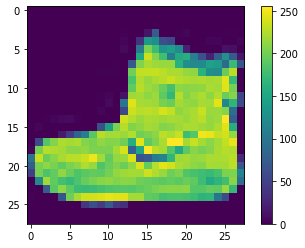

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Escalaremos esses valores no intervalo de 0 e 1 antes de alimentar o modelo da rede neural. Para fazer isso, dividimos os valores por 255. É importante que o *conjunto de treinamento* e o *conjunto de teste* podem ser pré-processados do mesmo modo:

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que os dados estão no formato correto e que estamos prontos para construir e treinar a rede, vamos mostrar as primeiras 25 imagens do *conjunto de treinamento* e mostrar o nome das classes de cada imagem abaixo.

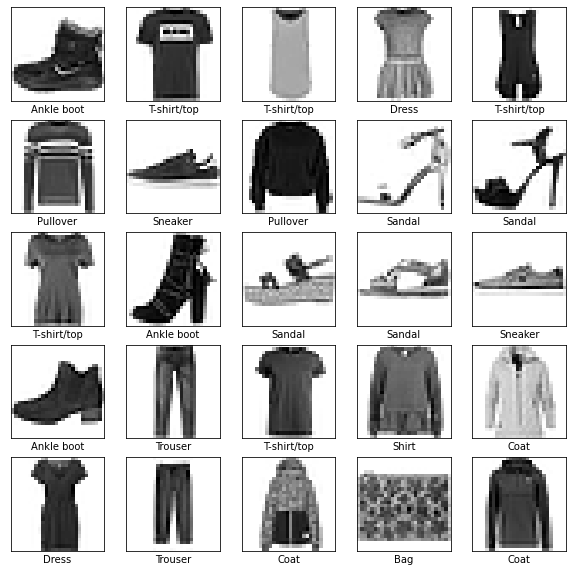

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construindo o modelo

Construir a rede neural requer configurar as camadas do modelo, e depois, compilar o modelo.

### Montar as camadas

O principal bloco de construção da rede neural é a camada (*layer*). As camadas (*layers*) extraem representações dos dados inseridos na rede. Com sorte, essas representações são significativas para o problema à mão.

Muito do *deep learning* consiste em encadear simples camadas. Muitas camadas, como `tf.keras.layers.Dense`, tem parâmetros que são aprendidos durante o treinamento.

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

A primeira camada da rede, `tf.keras.layers.Flatten`, transforma o formato da imagem de um array de imagens de duas dimensões (of 28 by 28 pixels) para um array de uma dimensão (de 28 * 28 = 784 pixels). Pense nessa camada como camadas não empilhadas de pixels de uma imagem e os enfilere. Essa camada não tem parâmetros para aprender; ela só reformata os dados.

Depois dos pixels serem achatados, a rede consiste de uma sequência de duas camadas `tf.keras.layers.Dense`. Essas são camadas neurais *densely connected*, ou *fully connected*. A primeira camada `Dense` tem 128 nós (ou neurônios). A segunda (e última) camada é uma *softmax*  de 10 nós que retorna um array de 10 probabilidades, cuja soma resulta em 1. Cada nó contém um valor que indica a probabilidade de que aquela imagem pertence a uma das 10 classes.

### Compile o modelo

Antes do modelo estar pronto para o treinamento, é necessário algumas configurações a mais. Essas serão adicionadas no passo de *compilação*:

* *Função Loss* —Essa mede quão precisa o modelo é durante o treinamento. Queremos minimizar a função para *guiar* o modelo para a direção certa.
* *Optimizer* —Isso é como o modelo se atualiza com base no dado que ele vê e sua função *loss*.
* *Métricas* —usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa a *acurácia*, a fração das imagens que foram classificadas corretamente.

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Treine o modelo

Treinar a rede neural requer os seguintes passos:

1. Alimente com os dados de treinamento, o modelo. Neste exemplo, os dados de treinamento são os arrays `train_images` e `train_labels`.
2. O modelo aprende como associar as imagens as *labels*.
3. Perguntamos ao modelo para fazer previsões sobre o conjunto de teste — nesse exemplo, o array `test_images`. Verificamos se as previsões combinaram com as *labels*  do array `test_labels`.

Para começar a treinar, chame o método `model.fit`— assim chamado, porque ele "encaixa" o modelo no conjunto de treinamento:

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


   1/1875 [..............................] - ETA: 23:08 - loss: 2.4210 - accuracy: 0.1250

  31/1875 [..............................] - ETA: 3s - loss: 1.7270 - accuracy: 0.4177   

  62/1875 [..............................] - ETA: 2s - loss: 1.4613 - accuracy: 0.5074

  93/1875 [>.............................] - ETA: 2s - loss: 1.3117 - accuracy: 0.5576

 125/1875 [=>............................] - ETA: 2s - loss: 1.2086 - accuracy: 0.5916

 156/1875 [=>............................] - ETA: 2s - loss: 1.1364 - accuracy: 0.6151

 187/1875 [=>............................] - ETA: 2s - loss: 1.0816 - accuracy: 0.6328

 216/1875 [==>...........................] - ETA: 2s - loss: 1.0407 - accuracy: 0.6462

 247/1875 [==>...........................] - ETA: 2s - loss: 1.0041 - accuracy: 0.6584

 279/1875 [===>..........................] - ETA: 2s - loss: 0.9721 - accuracy: 0.6691

 311/1875 [===>..........................] - ETA: 2s - loss: 0.9452 - accuracy: 0.6779

 342/1875 [====>.........................] - ETA: 2s - loss: 0.9227 - accuracy: 0.6852

 373/1875 [====>.........................] - ETA: 2s - loss: 0.9029 - accuracy: 0.6917

 404/1875 [=====>........................] - ETA: 2s - loss: 0.8854 - accuracy: 0.6974

 436/1875 [=====>........................] - ETA: 2s - loss: 0.8693 - accuracy: 0.7027

 467/1875 [======>.......................] - ETA: 2s - loss: 0.8550 - accuracy: 0.7074

 499/1875 [======>.......................] - ETA: 2s - loss: 0.8415 - accuracy: 0.7119

 530/1875 [=======>......................] - ETA: 2s - loss: 0.8297 - accuracy: 0.7159

 561/1875 [=======>......................] - ETA: 2s - loss: 0.8186 - accuracy: 0.7196

 592/1875 [========>.....................] - ETA: 2s - loss: 0.8082 - accuracy: 0.7231

 623/1875 [========>.....................] - ETA: 2s - loss: 0.7985 - accuracy: 0.7264

 655/1875 [=========>....................] - ETA: 1s - loss: 0.7892 - accuracy: 0.7295

 687/1875 [=========>....................] - ETA: 1s - loss: 0.7804 - accuracy: 0.7325

 718/1875 [==========>...................] - ETA: 1s - loss: 0.7723 - accuracy: 0.7351

 749/1875 [==========>...................] - ETA: 1s - loss: 0.7648 - accuracy: 0.7377

 780/1875 [===========>..................] - ETA: 1s - loss: 0.7577 - accuracy: 0.7400

 810/1875 [===========>..................] - ETA: 1s - loss: 0.7512 - accuracy: 0.7422

 841/1875 [============>.................] - ETA: 1s - loss: 0.7448 - accuracy: 0.7444

 873/1875 [============>.................] - ETA: 1s - loss: 0.7384 - accuracy: 0.7465

 905/1875 [=============>................] - ETA: 1s - loss: 0.7323 - accuracy: 0.7485

 937/1875 [=============>................] - ETA: 1s - loss: 0.7265 - accuracy: 0.7505

 968/1875 [==============>...............] - ETA: 1s - loss: 0.7212 - accuracy: 0.7523

 999/1875 [==============>...............] - ETA: 1s - loss: 0.7161 - accuracy: 0.7540

1030/1875 [===============>..............] - ETA: 1s - loss: 0.7112 - accuracy: 0.7556

1061/1875 [===============>..............] - ETA: 1s - loss: 0.7064 - accuracy: 0.7572

1093/1875 [================>.............] - ETA: 1s - loss: 0.7017 - accuracy: 0.7588

1124/1875 [================>.............] - ETA: 1s - loss: 0.6974 - accuracy: 0.7602

1155/1875 [=================>............] - ETA: 1s - loss: 0.6932 - accuracy: 0.7616

1185/1875 [=================>............] - ETA: 1s - loss: 0.6892 - accuracy: 0.7629

1215/1875 [==================>...........] - ETA: 1s - loss: 0.6854 - accuracy: 0.7642

1245/1875 [==================>...........] - ETA: 1s - loss: 0.6817 - accuracy: 0.7654

1275/1875 [===================>..........] - ETA: 0s - loss: 0.6782 - accuracy: 0.7666

1306/1875 [===================>..........] - ETA: 0s - loss: 0.6746 - accuracy: 0.7678

1337/1875 [====================>.........] - ETA: 0s - loss: 0.6711 - accuracy: 0.7689

1368/1875 [====================>.........] - ETA: 0s - loss: 0.6677 - accuracy: 0.7700

1398/1875 [=====================>........] - ETA: 0s - loss: 0.6645 - accuracy: 0.7711

1429/1875 [=====================>........] - ETA: 0s - loss: 0.6614 - accuracy: 0.7721

1460/1875 [======================>.......] - ETA: 0s - loss: 0.6583 - accuracy: 0.7732

1491/1875 [======================>.......] - ETA: 0s - loss: 0.6553 - accuracy: 0.7741

1521/1875 [=======================>......] - ETA: 0s - loss: 0.6524 - accuracy: 0.7750

1552/1875 [=======================>......] - ETA: 0s - loss: 0.6496 - accuracy: 0.7760

1583/1875 [========================>.....] - ETA: 0s - loss: 0.6468 - accuracy: 0.7769

1614/1875 [========================>.....] - ETA: 0s - loss: 0.6441 - accuracy: 0.7778

1645/1875 [=========================>....] - ETA: 0s - loss: 0.6414 - accuracy: 0.7786

1676/1875 [=========================>....] - ETA: 0s - loss: 0.6388 - accuracy: 0.7795

1707/1875 [==========================>...] - ETA: 0s - loss: 0.6363 - accuracy: 0.7803

1738/1875 [==========================>...] - ETA: 0s - loss: 0.6339 - accuracy: 0.7811

1769/1875 [===========================>..] - ETA: 0s - loss: 0.6315 - accuracy: 0.7819

1800/1875 [===========================>..] - ETA: 0s - loss: 0.6292 - accuracy: 0.7826

1831/1875 [============================>.] - ETA: 0s - loss: 0.6269 - accuracy: 0.7834

1862/1875 [============================>.] - ETA: 0s - loss: 0.6247 - accuracy: 0.7841

1875/1875 [==============================] - 4s 2ms/step - loss: 0.6237 - accuracy: 0.7844


Epoch 2/10
   1/1875 [..............................] - ETA: 3s - loss: 0.4956 - accuracy: 0.8125

  32/1875 [..............................] - ETA: 3s - loss: 0.3564 - accuracy: 0.8863

  63/1875 [>.............................] - ETA: 2s - loss: 0.3654 - accuracy: 0.8768

  93/1875 [>.............................] - ETA: 2s - loss: 0.3735 - accuracy: 0.8712

 123/1875 [>.............................] - ETA: 2s - loss: 0.3793 - accuracy: 0.8677

 154/1875 [=>............................] - ETA: 2s - loss: 0.3821 - accuracy: 0.8658

 185/1875 [=>............................] - ETA: 2s - loss: 0.3831 - accuracy: 0.8647

 216/1875 [==>...........................] - ETA: 2s - loss: 0.3841 - accuracy: 0.8638

 245/1875 [==>...........................] - ETA: 2s - loss: 0.3849 - accuracy: 0.8633

 276/1875 [===>..........................] - ETA: 2s - loss: 0.3852 - accuracy: 0.8630

 306/1875 [===>..........................] - ETA: 2s - loss: 0.3852 - accuracy: 0.8628

 337/1875 [====>.........................] - ETA: 2s - loss: 0.3853 - accuracy: 0.8625

 367/1875 [====>.........................] - ETA: 2s - loss: 0.3853 - accuracy: 0.8624

 398/1875 [=====>........................] - ETA: 2s - loss: 0.3851 - accuracy: 0.8623

 429/1875 [=====>........................] - ETA: 2s - loss: 0.3850 - accuracy: 0.8622

 459/1875 [======>.......................] - ETA: 2s - loss: 0.3849 - accuracy: 0.8621

 489/1875 [======>.......................] - ETA: 2s - loss: 0.3848 - accuracy: 0.8621

 520/1875 [=======>......................] - ETA: 2s - loss: 0.3847 - accuracy: 0.8621

 551/1875 [=======>......................] - ETA: 2s - loss: 0.3845 - accuracy: 0.8621

 581/1875 [========>.....................] - ETA: 2s - loss: 0.3844 - accuracy: 0.8621

 612/1875 [========>.....................] - ETA: 2s - loss: 0.3843 - accuracy: 0.8620

 642/1875 [=========>....................] - ETA: 2s - loss: 0.3843 - accuracy: 0.8620

 673/1875 [=========>....................] - ETA: 1s - loss: 0.3843 - accuracy: 0.8620

 704/1875 [==========>...................] - ETA: 1s - loss: 0.3843 - accuracy: 0.8620

 735/1875 [==========>...................] - ETA: 1s - loss: 0.3842 - accuracy: 0.8620

 766/1875 [===========>..................] - ETA: 1s - loss: 0.3841 - accuracy: 0.8620

 797/1875 [===========>..................] - ETA: 1s - loss: 0.3839 - accuracy: 0.8620

 828/1875 [============>.................] - ETA: 1s - loss: 0.3838 - accuracy: 0.8621

 859/1875 [============>.................] - ETA: 1s - loss: 0.3837 - accuracy: 0.8621

 890/1875 [=============>................] - ETA: 1s - loss: 0.3836 - accuracy: 0.8621

 921/1875 [=============>................] - ETA: 1s - loss: 0.3835 - accuracy: 0.8621

 951/1875 [==============>...............] - ETA: 1s - loss: 0.3835 - accuracy: 0.8621

 981/1875 [==============>...............] - ETA: 1s - loss: 0.3835 - accuracy: 0.8620

1012/1875 [===============>..............] - ETA: 1s - loss: 0.3835 - accuracy: 0.8620

1043/1875 [===============>..............] - ETA: 1s - loss: 0.3834 - accuracy: 0.8620

1074/1875 [================>.............] - ETA: 1s - loss: 0.3834 - accuracy: 0.8620

1103/1875 [================>.............] - ETA: 1s - loss: 0.3834 - accuracy: 0.8620

1134/1875 [=================>............] - ETA: 1s - loss: 0.3833 - accuracy: 0.8620

1165/1875 [=================>............] - ETA: 1s - loss: 0.3832 - accuracy: 0.8620

1196/1875 [==================>...........] - ETA: 1s - loss: 0.3831 - accuracy: 0.8620

1226/1875 [==================>...........] - ETA: 1s - loss: 0.3830 - accuracy: 0.8620

1257/1875 [===================>..........] - ETA: 1s - loss: 0.3829 - accuracy: 0.8620

1288/1875 [===================>..........] - ETA: 0s - loss: 0.3828 - accuracy: 0.8621

1319/1875 [====================>.........] - ETA: 0s - loss: 0.3826 - accuracy: 0.8621

1350/1875 [====================>.........] - ETA: 0s - loss: 0.3825 - accuracy: 0.8621

1381/1875 [=====================>........] - ETA: 0s - loss: 0.3824 - accuracy: 0.8621

1412/1875 [=====================>........] - ETA: 0s - loss: 0.3823 - accuracy: 0.8621

1444/1875 [======================>.......] - ETA: 0s - loss: 0.3821 - accuracy: 0.8622

1475/1875 [======================>.......] - ETA: 0s - loss: 0.3820 - accuracy: 0.8622

1506/1875 [=======================>......] - ETA: 0s - loss: 0.3818 - accuracy: 0.8622

1537/1875 [=======================>......] - ETA: 0s - loss: 0.3817 - accuracy: 0.8623

1568/1875 [========================>.....] - ETA: 0s - loss: 0.3816 - accuracy: 0.8623

1599/1875 [========================>.....] - ETA: 0s - loss: 0.3814 - accuracy: 0.8623

1630/1875 [=========================>....] - ETA: 0s - loss: 0.3813 - accuracy: 0.8624

1662/1875 [=========================>....] - ETA: 0s - loss: 0.3812 - accuracy: 0.8624

1693/1875 [==========================>...] - ETA: 0s - loss: 0.3810 - accuracy: 0.8624

1725/1875 [==========================>...] - ETA: 0s - loss: 0.3809 - accuracy: 0.8624

1756/1875 [===========================>..] - ETA: 0s - loss: 0.3808 - accuracy: 0.8625

1787/1875 [===========================>..] - ETA: 0s - loss: 0.3806 - accuracy: 0.8625

1819/1875 [============================>.] - ETA: 0s - loss: 0.3805 - accuracy: 0.8625

1851/1875 [============================>.] - ETA: 0s - loss: 0.3803 - accuracy: 0.8626

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3802 - accuracy: 0.8626


Epoch 3/10
   1/1875 [..............................] - ETA: 3s - loss: 0.3228 - accuracy: 0.8750

  33/1875 [..............................] - ETA: 2s - loss: 0.3210 - accuracy: 0.8735

  64/1875 [>.............................] - ETA: 2s - loss: 0.3255 - accuracy: 0.8763

  96/1875 [>.............................] - ETA: 2s - loss: 0.3271 - accuracy: 0.8759

 128/1875 [=>............................] - ETA: 2s - loss: 0.3297 - accuracy: 0.8750

 159/1875 [=>............................] - ETA: 2s - loss: 0.3316 - accuracy: 0.8748

 191/1875 [==>...........................] - ETA: 2s - loss: 0.3332 - accuracy: 0.8747

 223/1875 [==>...........................] - ETA: 2s - loss: 0.3349 - accuracy: 0.8745

 255/1875 [===>..........................] - ETA: 2s - loss: 0.3361 - accuracy: 0.8743

 286/1875 [===>..........................] - ETA: 2s - loss: 0.3369 - accuracy: 0.8743

 317/1875 [====>.........................] - ETA: 2s - loss: 0.3375 - accuracy: 0.8743

 349/1875 [====>.........................] - ETA: 2s - loss: 0.3381 - accuracy: 0.8742

 380/1875 [=====>........................] - ETA: 2s - loss: 0.3385 - accuracy: 0.8743

 411/1875 [=====>........................] - ETA: 2s - loss: 0.3389 - accuracy: 0.8743

 443/1875 [======>.......................] - ETA: 2s - loss: 0.3390 - accuracy: 0.8743

 475/1875 [======>.......................] - ETA: 2s - loss: 0.3390 - accuracy: 0.8744

 507/1875 [=======>......................] - ETA: 2s - loss: 0.3390 - accuracy: 0.8746

 538/1875 [=======>......................] - ETA: 2s - loss: 0.3386 - accuracy: 0.8748

 570/1875 [========>.....................] - ETA: 2s - loss: 0.3384 - accuracy: 0.8749

 602/1875 [========>.....................] - ETA: 2s - loss: 0.3380 - accuracy: 0.8751

 633/1875 [=========>....................] - ETA: 2s - loss: 0.3377 - accuracy: 0.8751

 664/1875 [=========>....................] - ETA: 1s - loss: 0.3375 - accuracy: 0.8752

 695/1875 [==========>...................] - ETA: 1s - loss: 0.3374 - accuracy: 0.8753

 726/1875 [==========>...................] - ETA: 1s - loss: 0.3373 - accuracy: 0.8753

 758/1875 [===========>..................] - ETA: 1s - loss: 0.3373 - accuracy: 0.8753

 789/1875 [===========>..................] - ETA: 1s - loss: 0.3372 - accuracy: 0.8754

 820/1875 [============>.................] - ETA: 1s - loss: 0.3372 - accuracy: 0.8754

 852/1875 [============>.................] - ETA: 1s - loss: 0.3372 - accuracy: 0.8754

 883/1875 [=============>................] - ETA: 1s - loss: 0.3371 - accuracy: 0.8754

 914/1875 [=============>................] - ETA: 1s - loss: 0.3371 - accuracy: 0.8754

 945/1875 [==============>...............] - ETA: 1s - loss: 0.3371 - accuracy: 0.8755

 976/1875 [==============>...............] - ETA: 1s - loss: 0.3370 - accuracy: 0.8755

1006/1875 [===============>..............] - ETA: 1s - loss: 0.3370 - accuracy: 0.8756

1037/1875 [===============>..............] - ETA: 1s - loss: 0.3369 - accuracy: 0.8756

1068/1875 [================>.............] - ETA: 1s - loss: 0.3369 - accuracy: 0.8757

1099/1875 [================>.............] - ETA: 1s - loss: 0.3368 - accuracy: 0.8757

1130/1875 [=================>............] - ETA: 1s - loss: 0.3367 - accuracy: 0.8758

1161/1875 [=================>............] - ETA: 1s - loss: 0.3366 - accuracy: 0.8758

1192/1875 [==================>...........] - ETA: 1s - loss: 0.3365 - accuracy: 0.8759

1224/1875 [==================>...........] - ETA: 1s - loss: 0.3364 - accuracy: 0.8759

1256/1875 [===================>..........] - ETA: 1s - loss: 0.3363 - accuracy: 0.8760

1287/1875 [===================>..........] - ETA: 0s - loss: 0.3363 - accuracy: 0.8760

1318/1875 [====================>.........] - ETA: 0s - loss: 0.3362 - accuracy: 0.8761

1350/1875 [====================>.........] - ETA: 0s - loss: 0.3361 - accuracy: 0.8761

1382/1875 [=====================>........] - ETA: 0s - loss: 0.3361 - accuracy: 0.8762

1413/1875 [=====================>........] - ETA: 0s - loss: 0.3360 - accuracy: 0.8762

1445/1875 [======================>.......] - ETA: 0s - loss: 0.3360 - accuracy: 0.8762

1476/1875 [======================>.......] - ETA: 0s - loss: 0.3360 - accuracy: 0.8763

1507/1875 [=======================>......] - ETA: 0s - loss: 0.3359 - accuracy: 0.8763

1538/1875 [=======================>......] - ETA: 0s - loss: 0.3359 - accuracy: 0.8763

1569/1875 [========================>.....] - ETA: 0s - loss: 0.3359 - accuracy: 0.8763

1600/1875 [========================>.....] - ETA: 0s - loss: 0.3359 - accuracy: 0.8763

1631/1875 [=========================>....] - ETA: 0s - loss: 0.3359 - accuracy: 0.8763

1662/1875 [=========================>....] - ETA: 0s - loss: 0.3359 - accuracy: 0.8764

1693/1875 [==========================>...] - ETA: 0s - loss: 0.3359 - accuracy: 0.8764

1724/1875 [==========================>...] - ETA: 0s - loss: 0.3359 - accuracy: 0.8764

1756/1875 [===========================>..] - ETA: 0s - loss: 0.3359 - accuracy: 0.8764

1787/1875 [===========================>..] - ETA: 0s - loss: 0.3358 - accuracy: 0.8764

1818/1875 [============================>.] - ETA: 0s - loss: 0.3358 - accuracy: 0.8764

1849/1875 [============================>.] - ETA: 0s - loss: 0.3358 - accuracy: 0.8764

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3358 - accuracy: 0.8765


Epoch 4/10
   1/1875 [..............................] - ETA: 3s - loss: 0.2684 - accuracy: 0.8438

  32/1875 [..............................] - ETA: 2s - loss: 0.3027 - accuracy: 0.8808

  63/1875 [>.............................] - ETA: 2s - loss: 0.3010 - accuracy: 0.8859

  94/1875 [>.............................] - ETA: 2s - loss: 0.3018 - accuracy: 0.8878

 125/1875 [=>............................] - ETA: 2s - loss: 0.3015 - accuracy: 0.8883

 155/1875 [=>............................] - ETA: 2s - loss: 0.3014 - accuracy: 0.8887

 186/1875 [=>............................] - ETA: 2s - loss: 0.3019 - accuracy: 0.8886

 218/1875 [==>...........................] - ETA: 2s - loss: 0.3021 - accuracy: 0.8888

 249/1875 [==>...........................] - ETA: 2s - loss: 0.3019 - accuracy: 0.8891

 280/1875 [===>..........................] - ETA: 2s - loss: 0.3018 - accuracy: 0.8893

 311/1875 [===>..........................] - ETA: 2s - loss: 0.3018 - accuracy: 0.8894

 341/1875 [====>.........................] - ETA: 2s - loss: 0.3018 - accuracy: 0.8894

 372/1875 [====>.........................] - ETA: 2s - loss: 0.3017 - accuracy: 0.8894

 403/1875 [=====>........................] - ETA: 2s - loss: 0.3019 - accuracy: 0.8893

 434/1875 [=====>........................] - ETA: 2s - loss: 0.3020 - accuracy: 0.8893

 465/1875 [======>.......................] - ETA: 2s - loss: 0.3021 - accuracy: 0.8893

 497/1875 [======>.......................] - ETA: 2s - loss: 0.3021 - accuracy: 0.8893

 529/1875 [=======>......................] - ETA: 2s - loss: 0.3021 - accuracy: 0.8893

 560/1875 [=======>......................] - ETA: 2s - loss: 0.3022 - accuracy: 0.8892

 591/1875 [========>.....................] - ETA: 2s - loss: 0.3023 - accuracy: 0.8892

 622/1875 [========>.....................] - ETA: 2s - loss: 0.3023 - accuracy: 0.8892

 653/1875 [=========>....................] - ETA: 1s - loss: 0.3024 - accuracy: 0.8892

 685/1875 [=========>....................] - ETA: 1s - loss: 0.3023 - accuracy: 0.8892

 717/1875 [==========>...................] - ETA: 1s - loss: 0.3024 - accuracy: 0.8892

 749/1875 [==========>...................] - ETA: 1s - loss: 0.3023 - accuracy: 0.8892

 781/1875 [===========>..................] - ETA: 1s - loss: 0.3023 - accuracy: 0.8892

 813/1875 [============>.................] - ETA: 1s - loss: 0.3023 - accuracy: 0.8892

 845/1875 [============>.................] - ETA: 1s - loss: 0.3023 - accuracy: 0.8891

 877/1875 [=============>................] - ETA: 1s - loss: 0.3024 - accuracy: 0.8891

 908/1875 [=============>................] - ETA: 1s - loss: 0.3024 - accuracy: 0.8891

 939/1875 [==============>...............] - ETA: 1s - loss: 0.3025 - accuracy: 0.8891

 971/1875 [==============>...............] - ETA: 1s - loss: 0.3026 - accuracy: 0.8891

1003/1875 [===============>..............] - ETA: 1s - loss: 0.3028 - accuracy: 0.8890

1035/1875 [===============>..............] - ETA: 1s - loss: 0.3029 - accuracy: 0.8889

1067/1875 [================>.............] - ETA: 1s - loss: 0.3031 - accuracy: 0.8888

1099/1875 [================>.............] - ETA: 1s - loss: 0.3033 - accuracy: 0.8888

1131/1875 [=================>............] - ETA: 1s - loss: 0.3035 - accuracy: 0.8887

1162/1875 [=================>............] - ETA: 1s - loss: 0.3036 - accuracy: 0.8886

1194/1875 [==================>...........] - ETA: 1s - loss: 0.3037 - accuracy: 0.8886

1225/1875 [==================>...........] - ETA: 1s - loss: 0.3038 - accuracy: 0.8885

1257/1875 [===================>..........] - ETA: 1s - loss: 0.3040 - accuracy: 0.8885

1289/1875 [===================>..........] - ETA: 0s - loss: 0.3041 - accuracy: 0.8885

1321/1875 [====================>.........] - ETA: 0s - loss: 0.3042 - accuracy: 0.8884

1352/1875 [====================>.........] - ETA: 0s - loss: 0.3043 - accuracy: 0.8884

1384/1875 [=====================>........] - ETA: 0s - loss: 0.3044 - accuracy: 0.8883

1417/1875 [=====================>........] - ETA: 0s - loss: 0.3045 - accuracy: 0.8883

1450/1875 [======================>.......] - ETA: 0s - loss: 0.3045 - accuracy: 0.8883

1483/1875 [======================>.......] - ETA: 0s - loss: 0.3046 - accuracy: 0.8883

1515/1875 [=======================>......] - ETA: 0s - loss: 0.3047 - accuracy: 0.8882

1547/1875 [=======================>......] - ETA: 0s - loss: 0.3047 - accuracy: 0.8882

1579/1875 [========================>.....] - ETA: 0s - loss: 0.3048 - accuracy: 0.8882

1611/1875 [========================>.....] - ETA: 0s - loss: 0.3048 - accuracy: 0.8881

1642/1875 [=========================>....] - ETA: 0s - loss: 0.3048 - accuracy: 0.8881

1674/1875 [=========================>....] - ETA: 0s - loss: 0.3049 - accuracy: 0.8881

1706/1875 [==========================>...] - ETA: 0s - loss: 0.3049 - accuracy: 0.8881

1738/1875 [==========================>...] - ETA: 0s - loss: 0.3050 - accuracy: 0.8881

1770/1875 [===========================>..] - ETA: 0s - loss: 0.3050 - accuracy: 0.8880

1802/1875 [===========================>..] - ETA: 0s - loss: 0.3051 - accuracy: 0.8880

1834/1875 [============================>.] - ETA: 0s - loss: 0.3051 - accuracy: 0.8880

1866/1875 [============================>.] - ETA: 0s - loss: 0.3051 - accuracy: 0.8880

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3052 - accuracy: 0.8880


Epoch 5/10
   1/1875 [..............................] - ETA: 2s - loss: 0.1698 - accuracy: 0.9062

  34/1875 [..............................] - ETA: 2s - loss: 0.3304 - accuracy: 0.8803

  66/1875 [>.............................] - ETA: 2s - loss: 0.3229 - accuracy: 0.8822

  97/1875 [>.............................] - ETA: 2s - loss: 0.3184 - accuracy: 0.8824

 129/1875 [=>............................] - ETA: 2s - loss: 0.3142 - accuracy: 0.8834

 161/1875 [=>............................] - ETA: 2s - loss: 0.3120 - accuracy: 0.8840

 193/1875 [==>...........................] - ETA: 2s - loss: 0.3107 - accuracy: 0.8844

 224/1875 [==>...........................] - ETA: 2s - loss: 0.3088 - accuracy: 0.8851

 256/1875 [===>..........................] - ETA: 2s - loss: 0.3071 - accuracy: 0.8856

 288/1875 [===>..........................] - ETA: 2s - loss: 0.3057 - accuracy: 0.8860

 320/1875 [====>.........................] - ETA: 2s - loss: 0.3046 - accuracy: 0.8863

 352/1875 [====>.........................] - ETA: 2s - loss: 0.3038 - accuracy: 0.8865

 384/1875 [=====>........................] - ETA: 2s - loss: 0.3032 - accuracy: 0.8867

 416/1875 [=====>........................] - ETA: 2s - loss: 0.3025 - accuracy: 0.8869

 448/1875 [======>.......................] - ETA: 2s - loss: 0.3020 - accuracy: 0.8871

 480/1875 [======>.......................] - ETA: 2s - loss: 0.3016 - accuracy: 0.8872

 512/1875 [=======>......................] - ETA: 2s - loss: 0.3011 - accuracy: 0.8874

 544/1875 [=======>......................] - ETA: 2s - loss: 0.3008 - accuracy: 0.8875

 576/1875 [========>.....................] - ETA: 2s - loss: 0.3005 - accuracy: 0.8876

 608/1875 [========>.....................] - ETA: 2s - loss: 0.3002 - accuracy: 0.8877

 639/1875 [=========>....................] - ETA: 1s - loss: 0.3000 - accuracy: 0.8877

 670/1875 [=========>....................] - ETA: 1s - loss: 0.2997 - accuracy: 0.8878

 701/1875 [==========>...................] - ETA: 1s - loss: 0.2995 - accuracy: 0.8878

 733/1875 [==========>...................] - ETA: 1s - loss: 0.2993 - accuracy: 0.8879

 764/1875 [===========>..................] - ETA: 1s - loss: 0.2991 - accuracy: 0.8879

 795/1875 [===========>..................] - ETA: 1s - loss: 0.2989 - accuracy: 0.8880

 828/1875 [============>.................] - ETA: 1s - loss: 0.2987 - accuracy: 0.8881

 860/1875 [============>.................] - ETA: 1s - loss: 0.2985 - accuracy: 0.8882

 892/1875 [=============>................] - ETA: 1s - loss: 0.2984 - accuracy: 0.8883

 924/1875 [=============>................] - ETA: 1s - loss: 0.2983 - accuracy: 0.8884

 956/1875 [==============>...............] - ETA: 1s - loss: 0.2981 - accuracy: 0.8884

 987/1875 [==============>...............] - ETA: 1s - loss: 0.2980 - accuracy: 0.8885

1019/1875 [===============>..............] - ETA: 1s - loss: 0.2979 - accuracy: 0.8886

1051/1875 [===============>..............] - ETA: 1s - loss: 0.2978 - accuracy: 0.8886

1083/1875 [================>.............] - ETA: 1s - loss: 0.2977 - accuracy: 0.8887

1116/1875 [================>.............] - ETA: 1s - loss: 0.2976 - accuracy: 0.8887

1148/1875 [=================>............] - ETA: 1s - loss: 0.2976 - accuracy: 0.8888

1180/1875 [=================>............] - ETA: 1s - loss: 0.2975 - accuracy: 0.8888

1211/1875 [==================>...........] - ETA: 1s - loss: 0.2975 - accuracy: 0.8889

1243/1875 [==================>...........] - ETA: 1s - loss: 0.2974 - accuracy: 0.8889

1275/1875 [===================>..........] - ETA: 0s - loss: 0.2973 - accuracy: 0.8890

1307/1875 [===================>..........] - ETA: 0s - loss: 0.2972 - accuracy: 0.8890

1339/1875 [====================>.........] - ETA: 0s - loss: 0.2971 - accuracy: 0.8891

1371/1875 [====================>.........] - ETA: 0s - loss: 0.2971 - accuracy: 0.8891

1403/1875 [=====================>........] - ETA: 0s - loss: 0.2970 - accuracy: 0.8892

1435/1875 [=====================>........] - ETA: 0s - loss: 0.2969 - accuracy: 0.8892

1467/1875 [======================>.......] - ETA: 0s - loss: 0.2968 - accuracy: 0.8893

1500/1875 [=======================>......] - ETA: 0s - loss: 0.2967 - accuracy: 0.8893

1532/1875 [=======================>......] - ETA: 0s - loss: 0.2967 - accuracy: 0.8894

1564/1875 [========================>.....] - ETA: 0s - loss: 0.2966 - accuracy: 0.8894

1596/1875 [========================>.....] - ETA: 0s - loss: 0.2965 - accuracy: 0.8894

1628/1875 [=========================>....] - ETA: 0s - loss: 0.2965 - accuracy: 0.8895

1659/1875 [=========================>....] - ETA: 0s - loss: 0.2964 - accuracy: 0.8895

1691/1875 [==========================>...] - ETA: 0s - loss: 0.2964 - accuracy: 0.8895

1723/1875 [==========================>...] - ETA: 0s - loss: 0.2963 - accuracy: 0.8896

1755/1875 [===========================>..] - ETA: 0s - loss: 0.2963 - accuracy: 0.8896

1786/1875 [===========================>..] - ETA: 0s - loss: 0.2962 - accuracy: 0.8896

1818/1875 [============================>.] - ETA: 0s - loss: 0.2962 - accuracy: 0.8897

1850/1875 [============================>.] - ETA: 0s - loss: 0.2961 - accuracy: 0.8897

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2961 - accuracy: 0.8897


Epoch 6/10
   1/1875 [..............................] - ETA: 3s - loss: 0.3966 - accuracy: 0.8438

  33/1875 [..............................] - ETA: 2s - loss: 0.2863 - accuracy: 0.8896

  65/1875 [>.............................] - ETA: 2s - loss: 0.2754 - accuracy: 0.8962

  97/1875 [>.............................] - ETA: 2s - loss: 0.2728 - accuracy: 0.8977

 129/1875 [=>............................] - ETA: 2s - loss: 0.2730 - accuracy: 0.8977

 161/1875 [=>............................] - ETA: 2s - loss: 0.2741 - accuracy: 0.8975

 193/1875 [==>...........................] - ETA: 2s - loss: 0.2750 - accuracy: 0.8977

 225/1875 [==>...........................] - ETA: 2s - loss: 0.2757 - accuracy: 0.8977

 257/1875 [===>..........................] - ETA: 2s - loss: 0.2761 - accuracy: 0.8975

 289/1875 [===>..........................] - ETA: 2s - loss: 0.2763 - accuracy: 0.8973

 320/1875 [====>.........................] - ETA: 2s - loss: 0.2763 - accuracy: 0.8972

 352/1875 [====>.........................] - ETA: 2s - loss: 0.2761 - accuracy: 0.8972

 384/1875 [=====>........................] - ETA: 2s - loss: 0.2761 - accuracy: 0.8972

 403/1875 [=====>........................] - ETA: 2s - loss: 0.2761 - accuracy: 0.8972

 431/1875 [=====>........................] - ETA: 2s - loss: 0.2763 - accuracy: 0.8971

 463/1875 [======>.......................] - ETA: 2s - loss: 0.2767 - accuracy: 0.8969

 496/1875 [======>.......................] - ETA: 2s - loss: 0.2770 - accuracy: 0.8968

 528/1875 [=======>......................] - ETA: 2s - loss: 0.2772 - accuracy: 0.8966

 560/1875 [=======>......................] - ETA: 2s - loss: 0.2773 - accuracy: 0.8965

 591/1875 [========>.....................] - ETA: 2s - loss: 0.2775 - accuracy: 0.8965

 623/1875 [========>.....................] - ETA: 2s - loss: 0.2776 - accuracy: 0.8964

 655/1875 [=========>....................] - ETA: 1s - loss: 0.2778 - accuracy: 0.8963

 686/1875 [=========>....................] - ETA: 1s - loss: 0.2779 - accuracy: 0.8962

 717/1875 [==========>...................] - ETA: 1s - loss: 0.2779 - accuracy: 0.8962

 749/1875 [==========>...................] - ETA: 1s - loss: 0.2779 - accuracy: 0.8962

 781/1875 [===========>..................] - ETA: 1s - loss: 0.2779 - accuracy: 0.8962

 813/1875 [============>.................] - ETA: 1s - loss: 0.2779 - accuracy: 0.8962

 844/1875 [============>.................] - ETA: 1s - loss: 0.2779 - accuracy: 0.8962

 876/1875 [=============>................] - ETA: 1s - loss: 0.2778 - accuracy: 0.8963

 908/1875 [=============>................] - ETA: 1s - loss: 0.2777 - accuracy: 0.8963

 939/1875 [==============>...............] - ETA: 1s - loss: 0.2776 - accuracy: 0.8964

 971/1875 [==============>...............] - ETA: 1s - loss: 0.2775 - accuracy: 0.8965

1003/1875 [===============>..............] - ETA: 1s - loss: 0.2774 - accuracy: 0.8965

1035/1875 [===============>..............] - ETA: 1s - loss: 0.2774 - accuracy: 0.8966

1067/1875 [================>.............] - ETA: 1s - loss: 0.2773 - accuracy: 0.8967

1098/1875 [================>.............] - ETA: 1s - loss: 0.2773 - accuracy: 0.8967

1129/1875 [=================>............] - ETA: 1s - loss: 0.2773 - accuracy: 0.8968

1161/1875 [=================>............] - ETA: 1s - loss: 0.2773 - accuracy: 0.8968

1193/1875 [==================>...........] - ETA: 1s - loss: 0.2773 - accuracy: 0.8968

1224/1875 [==================>...........] - ETA: 1s - loss: 0.2773 - accuracy: 0.8969

1256/1875 [===================>..........] - ETA: 1s - loss: 0.2773 - accuracy: 0.8969

1287/1875 [===================>..........] - ETA: 0s - loss: 0.2773 - accuracy: 0.8970

1319/1875 [====================>.........] - ETA: 0s - loss: 0.2774 - accuracy: 0.8970

1350/1875 [====================>.........] - ETA: 0s - loss: 0.2774 - accuracy: 0.8970

1381/1875 [=====================>........] - ETA: 0s - loss: 0.2774 - accuracy: 0.8971

1413/1875 [=====================>........] - ETA: 0s - loss: 0.2774 - accuracy: 0.8971

1445/1875 [======================>.......] - ETA: 0s - loss: 0.2774 - accuracy: 0.8971

1476/1875 [======================>.......] - ETA: 0s - loss: 0.2774 - accuracy: 0.8971

1508/1875 [=======================>......] - ETA: 0s - loss: 0.2774 - accuracy: 0.8971

1540/1875 [=======================>......] - ETA: 0s - loss: 0.2774 - accuracy: 0.8971

1571/1875 [========================>.....] - ETA: 0s - loss: 0.2774 - accuracy: 0.8972

1603/1875 [========================>.....] - ETA: 0s - loss: 0.2774 - accuracy: 0.8972

1635/1875 [=========================>....] - ETA: 0s - loss: 0.2774 - accuracy: 0.8972

1667/1875 [=========================>....] - ETA: 0s - loss: 0.2774 - accuracy: 0.8972

1699/1875 [==========================>...] - ETA: 0s - loss: 0.2775 - accuracy: 0.8972

1730/1875 [==========================>...] - ETA: 0s - loss: 0.2775 - accuracy: 0.8972

1761/1875 [===========================>..] - ETA: 0s - loss: 0.2775 - accuracy: 0.8972

1793/1875 [===========================>..] - ETA: 0s - loss: 0.2775 - accuracy: 0.8972

1824/1875 [============================>.] - ETA: 0s - loss: 0.2775 - accuracy: 0.8972

1855/1875 [============================>.] - ETA: 0s - loss: 0.2775 - accuracy: 0.8972

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2775 - accuracy: 0.8972


Epoch 7/10
   1/1875 [..............................] - ETA: 3s - loss: 0.2796 - accuracy: 0.9062

  33/1875 [..............................] - ETA: 2s - loss: 0.2602 - accuracy: 0.8999

  65/1875 [>.............................] - ETA: 2s - loss: 0.2648 - accuracy: 0.8980

  97/1875 [>.............................] - ETA: 2s - loss: 0.2645 - accuracy: 0.8991

 128/1875 [=>............................] - ETA: 2s - loss: 0.2638 - accuracy: 0.9000

 160/1875 [=>............................] - ETA: 2s - loss: 0.2640 - accuracy: 0.9001

 191/1875 [==>...........................] - ETA: 2s - loss: 0.2647 - accuracy: 0.8999

 223/1875 [==>...........................] - ETA: 2s - loss: 0.2648 - accuracy: 0.9000

 254/1875 [===>..........................] - ETA: 2s - loss: 0.2652 - accuracy: 0.8999

 285/1875 [===>..........................] - ETA: 2s - loss: 0.2658 - accuracy: 0.8998

 316/1875 [====>.........................] - ETA: 2s - loss: 0.2664 - accuracy: 0.8997

 347/1875 [====>.........................] - ETA: 2s - loss: 0.2668 - accuracy: 0.8996

 378/1875 [=====>........................] - ETA: 2s - loss: 0.2670 - accuracy: 0.8995

 410/1875 [=====>........................] - ETA: 2s - loss: 0.2673 - accuracy: 0.8995

 442/1875 [======>.......................] - ETA: 2s - loss: 0.2675 - accuracy: 0.8994

 474/1875 [======>.......................] - ETA: 2s - loss: 0.2678 - accuracy: 0.8993

 504/1875 [=======>......................] - ETA: 2s - loss: 0.2680 - accuracy: 0.8993

 535/1875 [=======>......................] - ETA: 2s - loss: 0.2681 - accuracy: 0.8993

 567/1875 [========>.....................] - ETA: 2s - loss: 0.2682 - accuracy: 0.8993

 599/1875 [========>.....................] - ETA: 2s - loss: 0.2681 - accuracy: 0.8993

 631/1875 [=========>....................] - ETA: 2s - loss: 0.2681 - accuracy: 0.8993

 662/1875 [=========>....................] - ETA: 1s - loss: 0.2680 - accuracy: 0.8994

 694/1875 [==========>...................] - ETA: 1s - loss: 0.2680 - accuracy: 0.8994

 726/1875 [==========>...................] - ETA: 1s - loss: 0.2679 - accuracy: 0.8995

 758/1875 [===========>..................] - ETA: 1s - loss: 0.2679 - accuracy: 0.8995

 789/1875 [===========>..................] - ETA: 1s - loss: 0.2678 - accuracy: 0.8996

 821/1875 [============>.................] - ETA: 1s - loss: 0.2677 - accuracy: 0.8997

 853/1875 [============>.................] - ETA: 1s - loss: 0.2676 - accuracy: 0.8997

 885/1875 [=============>................] - ETA: 1s - loss: 0.2676 - accuracy: 0.8998

 916/1875 [=============>................] - ETA: 1s - loss: 0.2675 - accuracy: 0.8999

 948/1875 [==============>...............] - ETA: 1s - loss: 0.2674 - accuracy: 0.9000

 979/1875 [==============>...............] - ETA: 1s - loss: 0.2674 - accuracy: 0.9000

1011/1875 [===============>..............] - ETA: 1s - loss: 0.2673 - accuracy: 0.9001

1042/1875 [===============>..............] - ETA: 1s - loss: 0.2672 - accuracy: 0.9002

1074/1875 [================>.............] - ETA: 1s - loss: 0.2672 - accuracy: 0.9003

1106/1875 [================>.............] - ETA: 1s - loss: 0.2671 - accuracy: 0.9003

1137/1875 [=================>............] - ETA: 1s - loss: 0.2670 - accuracy: 0.9004

1167/1875 [=================>............] - ETA: 1s - loss: 0.2669 - accuracy: 0.9004

1198/1875 [==================>...........] - ETA: 1s - loss: 0.2669 - accuracy: 0.9005

1229/1875 [==================>...........] - ETA: 1s - loss: 0.2668 - accuracy: 0.9005

1260/1875 [===================>..........] - ETA: 0s - loss: 0.2668 - accuracy: 0.9006

1290/1875 [===================>..........] - ETA: 0s - loss: 0.2667 - accuracy: 0.9006

1321/1875 [====================>.........] - ETA: 0s - loss: 0.2667 - accuracy: 0.9006

1351/1875 [====================>.........] - ETA: 0s - loss: 0.2667 - accuracy: 0.9007

1381/1875 [=====================>........] - ETA: 0s - loss: 0.2667 - accuracy: 0.9007

1409/1875 [=====================>........] - ETA: 0s - loss: 0.2666 - accuracy: 0.9007

1439/1875 [======================>.......] - ETA: 0s - loss: 0.2666 - accuracy: 0.9008

1470/1875 [======================>.......] - ETA: 0s - loss: 0.2666 - accuracy: 0.9008

1501/1875 [=======================>......] - ETA: 0s - loss: 0.2666 - accuracy: 0.9008

1532/1875 [=======================>......] - ETA: 0s - loss: 0.2666 - accuracy: 0.9008

1562/1875 [=======================>......] - ETA: 0s - loss: 0.2666 - accuracy: 0.9008

1594/1875 [========================>.....] - ETA: 0s - loss: 0.2666 - accuracy: 0.9009

1626/1875 [=========================>....] - ETA: 0s - loss: 0.2666 - accuracy: 0.9009

1657/1875 [=========================>....] - ETA: 0s - loss: 0.2666 - accuracy: 0.9009

1688/1875 [==========================>...] - ETA: 0s - loss: 0.2666 - accuracy: 0.9009

1719/1875 [==========================>...] - ETA: 0s - loss: 0.2666 - accuracy: 0.9009

1751/1875 [===========================>..] - ETA: 0s - loss: 0.2666 - accuracy: 0.9009

1783/1875 [===========================>..] - ETA: 0s - loss: 0.2666 - accuracy: 0.9009

1815/1875 [============================>.] - ETA: 0s - loss: 0.2666 - accuracy: 0.9010

1846/1875 [============================>.] - ETA: 0s - loss: 0.2666 - accuracy: 0.9010

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9010


Epoch 8/10
   1/1875 [..............................] - ETA: 2s - loss: 0.1556 - accuracy: 0.9062

  33/1875 [..............................] - ETA: 2s - loss: 0.2361 - accuracy: 0.9182

  64/1875 [>.............................] - ETA: 2s - loss: 0.2586 - accuracy: 0.9069

  95/1875 [>.............................] - ETA: 2s - loss: 0.2687 - accuracy: 0.9025

 127/1875 [=>............................] - ETA: 2s - loss: 0.2717 - accuracy: 0.9011

 159/1875 [=>............................] - ETA: 2s - loss: 0.2711 - accuracy: 0.9011

 190/1875 [==>...........................] - ETA: 2s - loss: 0.2704 - accuracy: 0.9009

 221/1875 [==>...........................] - ETA: 2s - loss: 0.2695 - accuracy: 0.9009

 252/1875 [===>..........................] - ETA: 2s - loss: 0.2684 - accuracy: 0.9010

 284/1875 [===>..........................] - ETA: 2s - loss: 0.2675 - accuracy: 0.9012

 315/1875 [====>.........................] - ETA: 2s - loss: 0.2670 - accuracy: 0.9014

 346/1875 [====>.........................] - ETA: 2s - loss: 0.2667 - accuracy: 0.9014

 377/1875 [=====>........................] - ETA: 2s - loss: 0.2662 - accuracy: 0.9016

 408/1875 [=====>........................] - ETA: 2s - loss: 0.2658 - accuracy: 0.9018

 439/1875 [======>.......................] - ETA: 2s - loss: 0.2653 - accuracy: 0.9019

 469/1875 [======>.......................] - ETA: 2s - loss: 0.2649 - accuracy: 0.9021

 500/1875 [=======>......................] - ETA: 2s - loss: 0.2646 - accuracy: 0.9023

 531/1875 [=======>......................] - ETA: 2s - loss: 0.2643 - accuracy: 0.9024

 563/1875 [========>.....................] - ETA: 2s - loss: 0.2641 - accuracy: 0.9026

 594/1875 [========>.....................] - ETA: 2s - loss: 0.2637 - accuracy: 0.9027

 626/1875 [=========>....................] - ETA: 2s - loss: 0.2634 - accuracy: 0.9029

 658/1875 [=========>....................] - ETA: 1s - loss: 0.2630 - accuracy: 0.9030

 689/1875 [==========>...................] - ETA: 1s - loss: 0.2627 - accuracy: 0.9031

 720/1875 [==========>...................] - ETA: 1s - loss: 0.2625 - accuracy: 0.9032

 751/1875 [===========>..................] - ETA: 1s - loss: 0.2623 - accuracy: 0.9033

 783/1875 [===========>..................] - ETA: 1s - loss: 0.2621 - accuracy: 0.9034

 815/1875 [============>.................] - ETA: 1s - loss: 0.2619 - accuracy: 0.9034

 846/1875 [============>.................] - ETA: 1s - loss: 0.2617 - accuracy: 0.9035

 877/1875 [=============>................] - ETA: 1s - loss: 0.2615 - accuracy: 0.9036

 909/1875 [=============>................] - ETA: 1s - loss: 0.2613 - accuracy: 0.9037

 940/1875 [==============>...............] - ETA: 1s - loss: 0.2612 - accuracy: 0.9037

 971/1875 [==============>...............] - ETA: 1s - loss: 0.2611 - accuracy: 0.9038

1002/1875 [===============>..............] - ETA: 1s - loss: 0.2609 - accuracy: 0.9038

1034/1875 [===============>..............] - ETA: 1s - loss: 0.2608 - accuracy: 0.9039

1066/1875 [================>.............] - ETA: 1s - loss: 0.2607 - accuracy: 0.9040

1095/1875 [================>.............] - ETA: 1s - loss: 0.2606 - accuracy: 0.9040

1126/1875 [=================>............] - ETA: 1s - loss: 0.2605 - accuracy: 0.9041

1158/1875 [=================>............] - ETA: 1s - loss: 0.2604 - accuracy: 0.9041

1189/1875 [==================>...........] - ETA: 1s - loss: 0.2603 - accuracy: 0.9042

1219/1875 [==================>...........] - ETA: 1s - loss: 0.2602 - accuracy: 0.9042

1250/1875 [===================>..........] - ETA: 1s - loss: 0.2601 - accuracy: 0.9043

1281/1875 [===================>..........] - ETA: 0s - loss: 0.2600 - accuracy: 0.9043

1312/1875 [===================>..........] - ETA: 0s - loss: 0.2599 - accuracy: 0.9043

1343/1875 [====================>.........] - ETA: 0s - loss: 0.2599 - accuracy: 0.9044

1374/1875 [====================>.........] - ETA: 0s - loss: 0.2598 - accuracy: 0.9044

1406/1875 [=====================>........] - ETA: 0s - loss: 0.2598 - accuracy: 0.9044

1437/1875 [=====================>........] - ETA: 0s - loss: 0.2597 - accuracy: 0.9045

1468/1875 [======================>.......] - ETA: 0s - loss: 0.2597 - accuracy: 0.9045

1499/1875 [======================>.......] - ETA: 0s - loss: 0.2597 - accuracy: 0.9045

1531/1875 [=======================>......] - ETA: 0s - loss: 0.2596 - accuracy: 0.9045

1563/1875 [========================>.....] - ETA: 0s - loss: 0.2596 - accuracy: 0.9045

1594/1875 [========================>.....] - ETA: 0s - loss: 0.2596 - accuracy: 0.9045

1625/1875 [=========================>....] - ETA: 0s - loss: 0.2596 - accuracy: 0.9045

1657/1875 [=========================>....] - ETA: 0s - loss: 0.2595 - accuracy: 0.9045

1689/1875 [==========================>...] - ETA: 0s - loss: 0.2595 - accuracy: 0.9046

1721/1875 [==========================>...] - ETA: 0s - loss: 0.2595 - accuracy: 0.9046

1751/1875 [===========================>..] - ETA: 0s - loss: 0.2594 - accuracy: 0.9046

1782/1875 [===========================>..] - ETA: 0s - loss: 0.2594 - accuracy: 0.9046

1813/1875 [============================>.] - ETA: 0s - loss: 0.2594 - accuracy: 0.9046

1845/1875 [============================>.] - ETA: 0s - loss: 0.2593 - accuracy: 0.9046

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2593 - accuracy: 0.9046


Epoch 9/10
   1/1875 [..............................] - ETA: 3s - loss: 0.1538 - accuracy: 0.9375

  32/1875 [..............................] - ETA: 2s - loss: 0.2648 - accuracy: 0.9035

  63/1875 [>.............................] - ETA: 2s - loss: 0.2624 - accuracy: 0.9075

  94/1875 [>.............................] - ETA: 2s - loss: 0.2591 - accuracy: 0.9088

 125/1875 [=>............................] - ETA: 2s - loss: 0.2550 - accuracy: 0.9102

 157/1875 [=>............................] - ETA: 2s - loss: 0.2513 - accuracy: 0.9110

 189/1875 [==>...........................] - ETA: 2s - loss: 0.2477 - accuracy: 0.9119

 219/1875 [==>...........................] - ETA: 2s - loss: 0.2453 - accuracy: 0.9123

 250/1875 [===>..........................] - ETA: 2s - loss: 0.2430 - accuracy: 0.9128

 282/1875 [===>..........................] - ETA: 2s - loss: 0.2412 - accuracy: 0.9133

 314/1875 [====>.........................] - ETA: 2s - loss: 0.2403 - accuracy: 0.9134

 346/1875 [====>.........................] - ETA: 2s - loss: 0.2399 - accuracy: 0.9134

 377/1875 [=====>........................] - ETA: 2s - loss: 0.2396 - accuracy: 0.9133

 409/1875 [=====>........................] - ETA: 2s - loss: 0.2392 - accuracy: 0.9133

 440/1875 [======>.......................] - ETA: 2s - loss: 0.2389 - accuracy: 0.9133

 472/1875 [======>.......................] - ETA: 2s - loss: 0.2386 - accuracy: 0.9132

 503/1875 [=======>......................] - ETA: 2s - loss: 0.2384 - accuracy: 0.9132

 534/1875 [=======>......................] - ETA: 2s - loss: 0.2382 - accuracy: 0.9131

 566/1875 [========>.....................] - ETA: 2s - loss: 0.2381 - accuracy: 0.9131

 598/1875 [========>.....................] - ETA: 2s - loss: 0.2379 - accuracy: 0.9130

 629/1875 [=========>....................] - ETA: 2s - loss: 0.2379 - accuracy: 0.9129

 661/1875 [=========>....................] - ETA: 1s - loss: 0.2378 - accuracy: 0.9129

 694/1875 [==========>...................] - ETA: 1s - loss: 0.2377 - accuracy: 0.9128

 726/1875 [==========>...................] - ETA: 1s - loss: 0.2377 - accuracy: 0.9127

 757/1875 [===========>..................] - ETA: 1s - loss: 0.2378 - accuracy: 0.9127

 789/1875 [===========>..................] - ETA: 1s - loss: 0.2379 - accuracy: 0.9126

 821/1875 [============>.................] - ETA: 1s - loss: 0.2380 - accuracy: 0.9124

 852/1875 [============>.................] - ETA: 1s - loss: 0.2382 - accuracy: 0.9123

 884/1875 [=============>................] - ETA: 1s - loss: 0.2383 - accuracy: 0.9122

 915/1875 [=============>................] - ETA: 1s - loss: 0.2385 - accuracy: 0.9122

 947/1875 [==============>...............] - ETA: 1s - loss: 0.2386 - accuracy: 0.9121

 979/1875 [==============>...............] - ETA: 1s - loss: 0.2387 - accuracy: 0.9120

1011/1875 [===============>..............] - ETA: 1s - loss: 0.2388 - accuracy: 0.9119

1041/1875 [===============>..............] - ETA: 1s - loss: 0.2389 - accuracy: 0.9119

1073/1875 [================>.............] - ETA: 1s - loss: 0.2390 - accuracy: 0.9118

1105/1875 [================>.............] - ETA: 1s - loss: 0.2392 - accuracy: 0.9117

1135/1875 [=================>............] - ETA: 1s - loss: 0.2393 - accuracy: 0.9116

1166/1875 [=================>............] - ETA: 1s - loss: 0.2394 - accuracy: 0.9115

1198/1875 [==================>...........] - ETA: 1s - loss: 0.2395 - accuracy: 0.9115

1230/1875 [==================>...........] - ETA: 1s - loss: 0.2397 - accuracy: 0.9114

1261/1875 [===================>..........] - ETA: 0s - loss: 0.2398 - accuracy: 0.9113

1292/1875 [===================>..........] - ETA: 0s - loss: 0.2399 - accuracy: 0.9112

1324/1875 [====================>.........] - ETA: 0s - loss: 0.2400 - accuracy: 0.9112

1355/1875 [====================>.........] - ETA: 0s - loss: 0.2401 - accuracy: 0.9111

1387/1875 [=====================>........] - ETA: 0s - loss: 0.2402 - accuracy: 0.9110

1418/1875 [=====================>........] - ETA: 0s - loss: 0.2403 - accuracy: 0.9109

1449/1875 [======================>.......] - ETA: 0s - loss: 0.2405 - accuracy: 0.9109

1480/1875 [======================>.......] - ETA: 0s - loss: 0.2406 - accuracy: 0.9108

1511/1875 [=======================>......] - ETA: 0s - loss: 0.2407 - accuracy: 0.9107

1542/1875 [=======================>......] - ETA: 0s - loss: 0.2407 - accuracy: 0.9107

1574/1875 [========================>.....] - ETA: 0s - loss: 0.2408 - accuracy: 0.9106

1606/1875 [========================>.....] - ETA: 0s - loss: 0.2409 - accuracy: 0.9106

1637/1875 [=========================>....] - ETA: 0s - loss: 0.2411 - accuracy: 0.9105

1668/1875 [=========================>....] - ETA: 0s - loss: 0.2412 - accuracy: 0.9105

1700/1875 [==========================>...] - ETA: 0s - loss: 0.2413 - accuracy: 0.9104

1731/1875 [==========================>...] - ETA: 0s - loss: 0.2414 - accuracy: 0.9104

1763/1875 [===========================>..] - ETA: 0s - loss: 0.2415 - accuracy: 0.9103

1794/1875 [===========================>..] - ETA: 0s - loss: 0.2416 - accuracy: 0.9102

1825/1875 [============================>.] - ETA: 0s - loss: 0.2417 - accuracy: 0.9102

1857/1875 [============================>.] - ETA: 0s - loss: 0.2418 - accuracy: 0.9102

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2418 - accuracy: 0.9101


Epoch 10/10
   1/1875 [..............................] - ETA: 3s - loss: 0.1037 - accuracy: 0.9688

  33/1875 [..............................] - ETA: 2s - loss: 0.2379 - accuracy: 0.9110

  64/1875 [>.............................] - ETA: 2s - loss: 0.2403 - accuracy: 0.9098

  95/1875 [>.............................] - ETA: 2s - loss: 0.2360 - accuracy: 0.9110

 127/1875 [=>............................] - ETA: 2s - loss: 0.2335 - accuracy: 0.9117

 158/1875 [=>............................] - ETA: 2s - loss: 0.2335 - accuracy: 0.9115

 190/1875 [==>...........................] - ETA: 2s - loss: 0.2332 - accuracy: 0.9115

 222/1875 [==>...........................] - ETA: 2s - loss: 0.2324 - accuracy: 0.9117

 252/1875 [===>..........................] - ETA: 2s - loss: 0.2320 - accuracy: 0.9120

 282/1875 [===>..........................] - ETA: 2s - loss: 0.2317 - accuracy: 0.9120

 313/1875 [====>.........................] - ETA: 2s - loss: 0.2315 - accuracy: 0.9121

 344/1875 [====>.........................] - ETA: 2s - loss: 0.2313 - accuracy: 0.9123

 375/1875 [=====>........................] - ETA: 2s - loss: 0.2314 - accuracy: 0.9124

 405/1875 [=====>........................] - ETA: 2s - loss: 0.2316 - accuracy: 0.9125

 437/1875 [=====>........................] - ETA: 2s - loss: 0.2316 - accuracy: 0.9127

 467/1875 [======>.......................] - ETA: 2s - loss: 0.2316 - accuracy: 0.9128

 497/1875 [======>.......................] - ETA: 2s - loss: 0.2316 - accuracy: 0.9129

 527/1875 [=======>......................] - ETA: 2s - loss: 0.2315 - accuracy: 0.9130

 558/1875 [=======>......................] - ETA: 2s - loss: 0.2316 - accuracy: 0.9130

 589/1875 [========>.....................] - ETA: 2s - loss: 0.2316 - accuracy: 0.9131

 620/1875 [========>.....................] - ETA: 2s - loss: 0.2317 - accuracy: 0.9131

 651/1875 [=========>....................] - ETA: 2s - loss: 0.2317 - accuracy: 0.9132

 682/1875 [=========>....................] - ETA: 1s - loss: 0.2317 - accuracy: 0.9132

 712/1875 [==========>...................] - ETA: 1s - loss: 0.2318 - accuracy: 0.9132

 744/1875 [==========>...................] - ETA: 1s - loss: 0.2318 - accuracy: 0.9132

 775/1875 [===========>..................] - ETA: 1s - loss: 0.2319 - accuracy: 0.9132

 805/1875 [===========>..................] - ETA: 1s - loss: 0.2319 - accuracy: 0.9132

 836/1875 [============>.................] - ETA: 1s - loss: 0.2320 - accuracy: 0.9132

 868/1875 [============>.................] - ETA: 1s - loss: 0.2321 - accuracy: 0.9132

 900/1875 [=============>................] - ETA: 1s - loss: 0.2321 - accuracy: 0.9132

 930/1875 [=============>................] - ETA: 1s - loss: 0.2322 - accuracy: 0.9131

 961/1875 [==============>...............] - ETA: 1s - loss: 0.2323 - accuracy: 0.9131

 993/1875 [==============>...............] - ETA: 1s - loss: 0.2324 - accuracy: 0.9131

1024/1875 [===============>..............] - ETA: 1s - loss: 0.2325 - accuracy: 0.9131

1055/1875 [===============>..............] - ETA: 1s - loss: 0.2326 - accuracy: 0.9130

1086/1875 [================>.............] - ETA: 1s - loss: 0.2327 - accuracy: 0.9130

1117/1875 [================>.............] - ETA: 1s - loss: 0.2328 - accuracy: 0.9130

1148/1875 [=================>............] - ETA: 1s - loss: 0.2329 - accuracy: 0.9129

1179/1875 [=================>............] - ETA: 1s - loss: 0.2330 - accuracy: 0.9129

1210/1875 [==================>...........] - ETA: 1s - loss: 0.2331 - accuracy: 0.9129

1242/1875 [==================>...........] - ETA: 1s - loss: 0.2332 - accuracy: 0.9128

1273/1875 [===================>..........] - ETA: 0s - loss: 0.2334 - accuracy: 0.9128

1305/1875 [===================>..........] - ETA: 0s - loss: 0.2335 - accuracy: 0.9128

1337/1875 [====================>.........] - ETA: 0s - loss: 0.2336 - accuracy: 0.9127

1369/1875 [====================>.........] - ETA: 0s - loss: 0.2337 - accuracy: 0.9127

1400/1875 [=====================>........] - ETA: 0s - loss: 0.2337 - accuracy: 0.9127

1432/1875 [=====================>........] - ETA: 0s - loss: 0.2338 - accuracy: 0.9127

1463/1875 [======================>.......] - ETA: 0s - loss: 0.2339 - accuracy: 0.9127

1495/1875 [======================>.......] - ETA: 0s - loss: 0.2339 - accuracy: 0.9126

1526/1875 [=======================>......] - ETA: 0s - loss: 0.2340 - accuracy: 0.9126

1558/1875 [=======================>......] - ETA: 0s - loss: 0.2341 - accuracy: 0.9126

1588/1875 [========================>.....] - ETA: 0s - loss: 0.2341 - accuracy: 0.9126

1620/1875 [========================>.....] - ETA: 0s - loss: 0.2342 - accuracy: 0.9126

1651/1875 [=========================>....] - ETA: 0s - loss: 0.2342 - accuracy: 0.9125

1682/1875 [=========================>....] - ETA: 0s - loss: 0.2343 - accuracy: 0.9125

1714/1875 [==========================>...] - ETA: 0s - loss: 0.2344 - accuracy: 0.9125

1746/1875 [==========================>...] - ETA: 0s - loss: 0.2344 - accuracy: 0.9125

1777/1875 [===========================>..] - ETA: 0s - loss: 0.2345 - accuracy: 0.9124

1808/1875 [===========================>..] - ETA: 0s - loss: 0.2345 - accuracy: 0.9124

1839/1875 [============================>.] - ETA: 0s - loss: 0.2346 - accuracy: 0.9124

1871/1875 [============================>.] - ETA: 0s - loss: 0.2347 - accuracy: 0.9124

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2347 - accuracy: 0.9124


À medida que o modelo treina, as métricas loss e acurácia são mostradas. O modelo atinge uma acurácia de 0.88 (ou 88%) com o conjunto de treinamento.

## Avalie a acurácia

Depois, compare como o modelo performou com o conjunto de teste:

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3342 - accuracy: 0.8823



Test accuracy: 0.8823000192642212


Acabou que o a acurácia com o conjunto de teste é um pouco menor do que a acurácia de treinamento. Essa diferença entre as duas acurácias representa um *overfitting*. Overfitting é modelo de aprendizado de máquina performou de maneira pior em um conjunto de entradas novas, e não usadas anteriormente, que usando o conjunto de treinamento.

## Faça predições

Com o modelo treinado, o usaremos para predições de algumas imagens.

In [18]:
predictions = model.predict(test_images)

Aqui, o modelo previu que a *label* de cada imagem no conjunto de treinamento. Vamos olhar na primeira predição:

In [19]:
predictions[0]

array([3.2807145e-07, 1.0875438e-09, 4.7872772e-10, 1.3293636e-10,
       4.8750839e-09, 6.3827081e-04, 1.3278054e-04, 2.0520254e-03,
       3.5905177e-08, 9.9717653e-01], dtype=float32)

A predição é um array de 10 números. Eles representam um a *confiança* do modelo que a imagem corresponde a cada um dos diferentes artigos de roupa. Podemos ver cada *label*  tem um maior valor de confiança:

In [20]:
np.argmax(predictions[0])

9

Então, o modelo é confiante de que esse imagem é uma bota (ankle boot) ou `class_names[9]`. Examinando a label do teste, vemos que essa classificação é correta:

In [21]:
test_labels[0]

9

Podemos mostrar graficamente como se parece em um conjunto total de previsão de 10 classes.

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Vamos olhar a previsão imagem na posição 0, do array de predição.

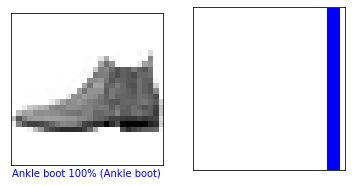

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

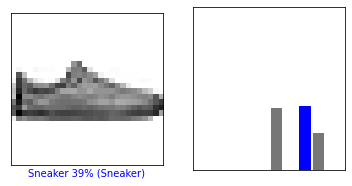

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Vamos plotar algumas da previsão do modelo. Labels preditas corretamente são azuis e as predições erradas são vermelhas. O número dá a porcentagem (de 100) das labels preditas. Note que o modelo pode errar mesmo estando confiante.

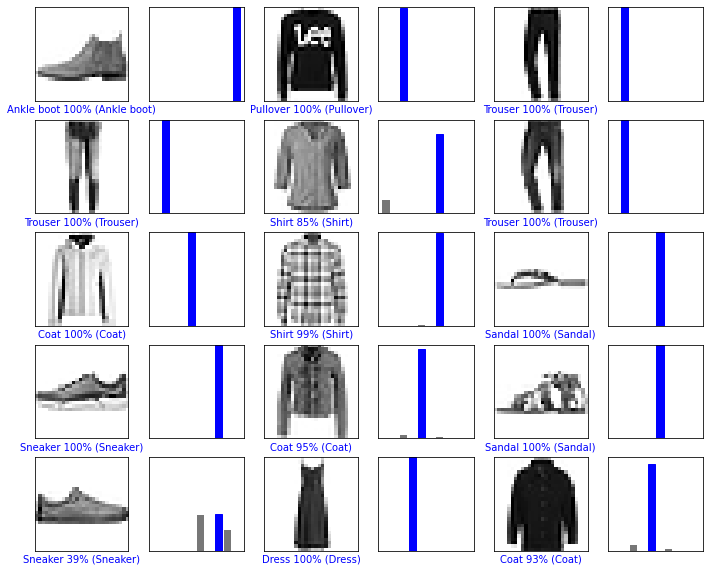

In [25]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Finamente, use o modelo treinado para fazer a predição de uma única imagem.

In [26]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


Modelos `tf.keras` são otimizados para fazer predições em um *batch*, ou coleções, de exemplos de uma vez. De acordo, mesmo que usemos uma única imagem, precisamos adicionar em uma lista:

In [27]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Agora prediremos a label correta para essa imagem:

In [28]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.2807174e-07 1.0875438e-09 4.7872772e-10 1.3293584e-10 4.8750932e-09
  6.3827110e-04 1.3278067e-04 2.0520263e-03 3.5905177e-08 9.9717653e-01]]


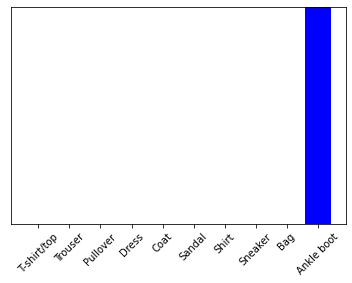

In [29]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` retorna a lista de listas — uma lista para cada imagem em um *batch* de dados. Pegue a predição de nossa (única) imagem no *batch*:

In [30]:
np.argmax(predictions_single[0])

9

E, como antes, o modelo previu a label como 9.